# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [3]:
dt <- data.table::fread("../../_m/clincial_phenotypes_enrichment_analysis_3brainRegions.tsv")
dt %>% head(2)

Tissue,Comparison,OR,P-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Caudate,BS_Caudate_DEG,2.756170,1.392999e-25,5.432696e-24
Caudate,BS_DLPFC_DEG,2.349303,4.310847e-03,8.848580e-03


In [7]:
log2(dt$OR) %>% min

[1] -0.3883753

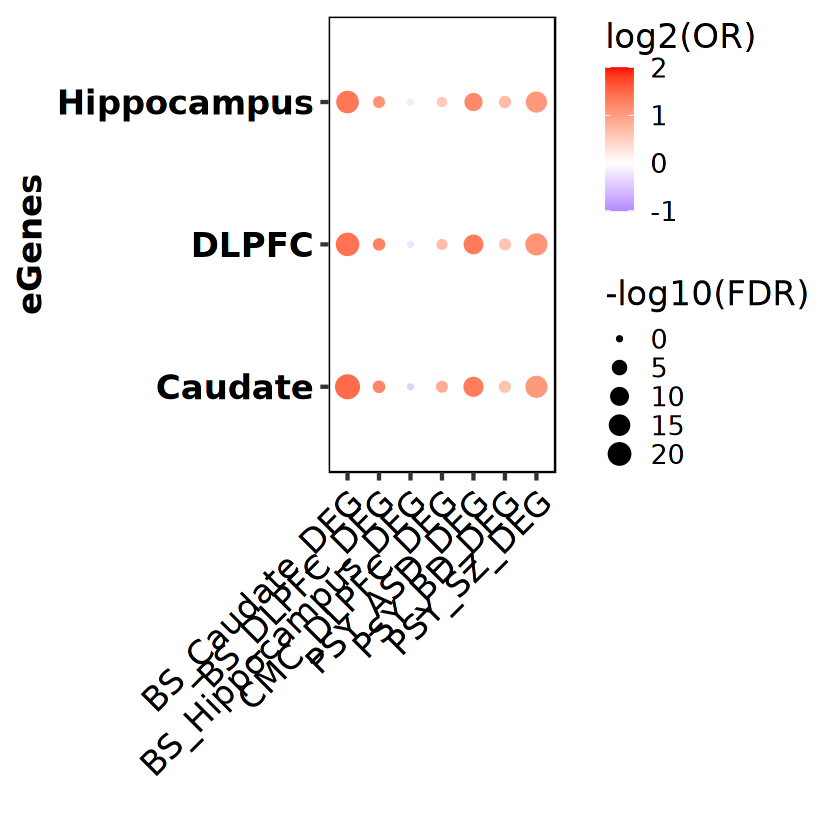

In [9]:
dotplot <- dt %>% filter(str_detect(Comparison, "DEG")) %>%
    mutate(`-log10(FDR)` = -log10(FDR), `log2(OR)` = log2(OR)) %>% 
    ggplot(aes(x=`Comparison`, y=Tissue, color=`log2(OR)`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('eGenes') + xlab('') + 
    scale_color_gradient2(midpoint = 0, low = "blue", mid = "white",
                          high = "red", space = "Lab", limits=c(-1,4)) +
    ggpubr::theme_pubr(base_size=20, border=TRUE) + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), 
          legend.position="right", 
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_deg", 10, 7)
dotplot

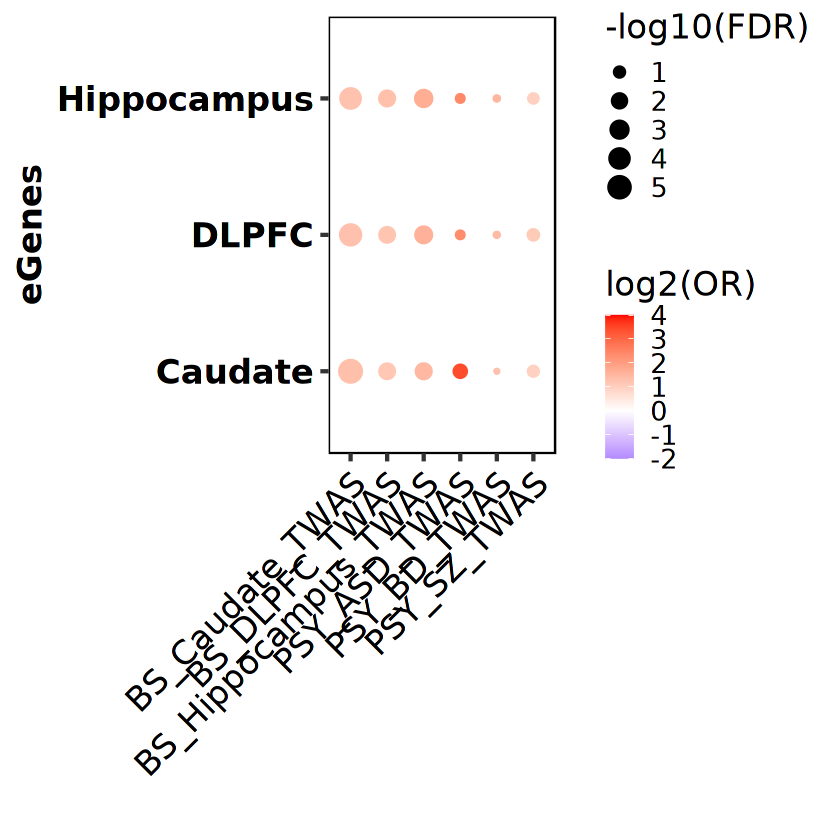

In [15]:
dotplot <- dt %>% filter(str_detect(Comparison, "TWAS")) %>%
    mutate(`-log10(FDR)` = -log10(FDR), `log2(OR)` = log2(OR)) %>% 
    ggplot(aes(x=`Comparison`, y=Tissue, color=`log2(OR)`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('eGenes') + xlab('') + 
    scale_color_gradient2(midpoint = 0, low = "blue", mid = "white",
                          high = "red", space = "Lab", limits=c(-1,4)) +
    #scale_size_continuous(limits=c(0, 10)) + 
    ggpubr::theme_pubr(base_size=20, border=TRUE) + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), 
          legend.position="right",
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_twas", 9, 7)
dotplot

## Reproducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()